In [13]:
import math
import itertools
import matplotlib.pyplot as plt

def compute_renormalized_J(J, n, r_max):
    # Define J_r for r=1 to r_max
    Js = [0] + [J / (r ** n) for r in range(1, r_max + 1)]
    
    # Cluster size N = r_max + 1
    N = r_max + 1
    
    # Number of internal spins
    num_internal = N - 2
    
    # Compute R(++)
    R_pp = 0.0
    for config in itertools.product([-1, 1], repeat=num_internal):
        spins = [1] + list(config) + [1]
        energy = 0.0
        for i in range(N):
            for j in range(i + 1, N):
                dist = j - i
                if dist <= r_max:
                    energy += Js[dist] * spins[i] * spins[j]
        R_pp += math.exp(energy)
    
    # Compute R(+-)
    R_pm = 0.0
    for config in itertools.product([-1, 1], repeat=num_internal):
        spins = [1] + list(config) + [-1]
        energy = 0.0
        for i in range(N):
            for j in range(i + 1, N):
                dist = j - i
                if dist <= r_max:
                    energy += Js[dist] * spins[i] * spins[j]
        R_pm += math.exp(energy)
    
    # Compute J'
    if R_pm == 0:
        raise ValueError("R(+-) is zero, cannot compute log.")
    J_prime = 0.5 * math.log(R_pp / R_pm)
    
    return J_prime

def plot_rg_flow(initial_J, n, r_max, num_steps):
    J_values = [initial_J]
    current_J = initial_J
    for step in range(num_steps):
        current_J = compute_renormalized_J(current_J, n, r_max)
        J_values.append(current_J)
    
    steps = list(range(num_steps + 1))
    
    plt.figure(figsize=(10, 6))
    plt.plot(steps, J_values, marker='o')
    plt.xlabel('RG Step')
    plt.ylabel('J')
    plt.title('RG Flow')
    plt.grid(True)
    plt.show()

In [8]:
J = 1.0  # initial J1
n = 2.5  # power-law exponent
r_max = 20  # threshold distance
print(compute_renormalized_J(J, n, r_max))

0.3796771636918629


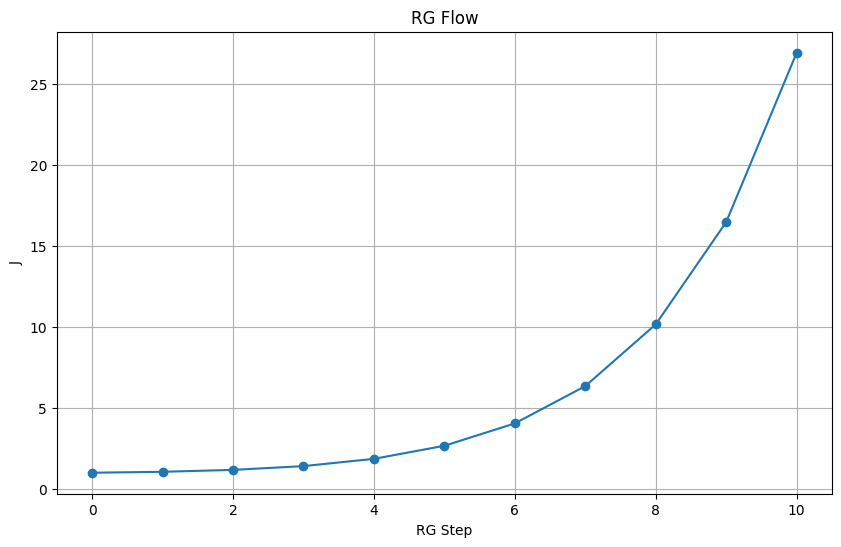

In [17]:
initial_J = 1.0
n = 1.9
r_max = 15
num_steps = 10
plot_rg_flow(initial_J, n, r_max, num_steps)

In [ ]:
# Parameters for plotting
J = 1.0  # initial J
n = 2.5  # power-law exponent
max_r = 30  # maximum r to plot up to (adjust as needed, but note exponential computation time)

# Compute J' for each r
r_values = list(range(1, max_r + 1))
J_primes = [compute_renormalized_J(J, n, r) for r in r_values]

# Plot
plt.plot(r_values, J_primes, marker='o')
plt.xlabel('r')
plt.ylabel("J'")
plt.title("Effect of r on renormalized J'")
plt.grid(True)
plt.show()